In [88]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [89]:
county_list = pd.read_csv("county-list.csv")
county_population = pd.read_csv("countypopulation2010_2019v2.csv")


In [90]:
county_list.keys()


Index(['county_number', 'county_name', 'region', 'location1', 'location2'], dtype='object')

In [91]:
county_population.keys()

Index(['table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [92]:
county_populationv2 = county_population.drop(index=[0,1], axis=0)
county_populationv2.head()


,table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,California,37253956.00,37254519.00,37319502.00,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
4,Alameda,1510271.00,1510258.00,1512986.00,1530915.0,1553764.0,1579593.0,1607792.0,1634538.0,1650950.0,1660196.0,1666756.0,1671329.0
5,Alpine,1175.00,1175.00,1161.00,1093.0,1110.0,1128.0,1080.0,1077.0,1047.0,1111.0,1089.0,1129.0
6,Amador,38091.00,38091.00,37886.00,37543.0,37104.0,36620.0,36726.0,37031.0,37429.0,38529.0,39405.0,39752.0


In [93]:
county_populationv2 = county_populationv2.rename(columns={"table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)":"County",
                                                          "Unnamed: 1":"Census",
                                                          "Unnamed: 2":"Estimates Base",
                                                          "Unnamed: 3":"2010",
                                                          "Unnamed: 4":"2011",
                                                          "Unnamed: 5":"2012",
                                                          "Unnamed: 6":"2013",
                                                          "Unnamed: 7":"2014",
                                                          "Unnamed: 8":"2015",
                                                          "Unnamed: 9":"2016",
                                                          "Unnamed: 10":"2017",
                                                          "Unnamed: 11":"2018",
                                                          "Unnamed: 12":"2019"
                                                         })
county_populationv3 = county_populationv2.drop(index=[2,3,62,63,64,65,66], axis=0)
#county_populationv3 = county_populationv3.set_index('County')

county_populationv3.head(10)

,County,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,Alameda,1510271.00,1510258.00,1512986.00,1530915.0,1553764.0,1579593.0,1607792.0,1634538.0,1650950.0,1660196.0,1666756.0,1671329.0
5,Alpine,1175.00,1175.00,1161.00,1093.0,1110.0,1128.0,1080.0,1077.0,1047.0,1111.0,1089.0,1129.0
6,Amador,38091.00,38091.00,37886.00,37543.0,37104.0,36620.0,36726.0,37031.0,37429.0,38529.0,39405.0,39752.0
7,Butte,220000.00,220005.00,219949.00,219975.0,220869.0,221641.0,223516.0,224631.0,226231.0,228696.0,230339.0,219186.0
8,Calaveras,45578.00,45578.00,45468.00,45160.0,44815.0,44655.0,44671.0,44965.0,45322.0,45681.0,45698.0,45905.0
9,Colusa,21419.00,21407.00,21437.00,21323.0,21284.0,21250.0,21176.0,21231.0,21496.0,21579.0,21418.0,21547.0
10,Contra Costa,1049025.00,1049204.00,1052540.00,1065440.0,1077548.0,1093401.0,1108876.0,1124405.0,1137268.0,1145535.0,1150519.0,1153526.0
11,Del Norte,28610.00,28610.00,28566.00,28443.0,28190.0,27816.0,27175.0,27190.0,27382.0,27351.0,27740.0,27812.0
12,El Dorado,181058.00,181058.00,181136.00,180936.0,180575.0,181481.0,183108.0,184569.0,185976.0,188679.0,190746.0,192843.0
13,Fresno,930450.00,930507.00,932039.00,939406.0,945045.0,951514.0,960567.0,969488.0,976830.0,985238.0,991950.0,999101.0


Text(0, 0.5, '% Comparison')

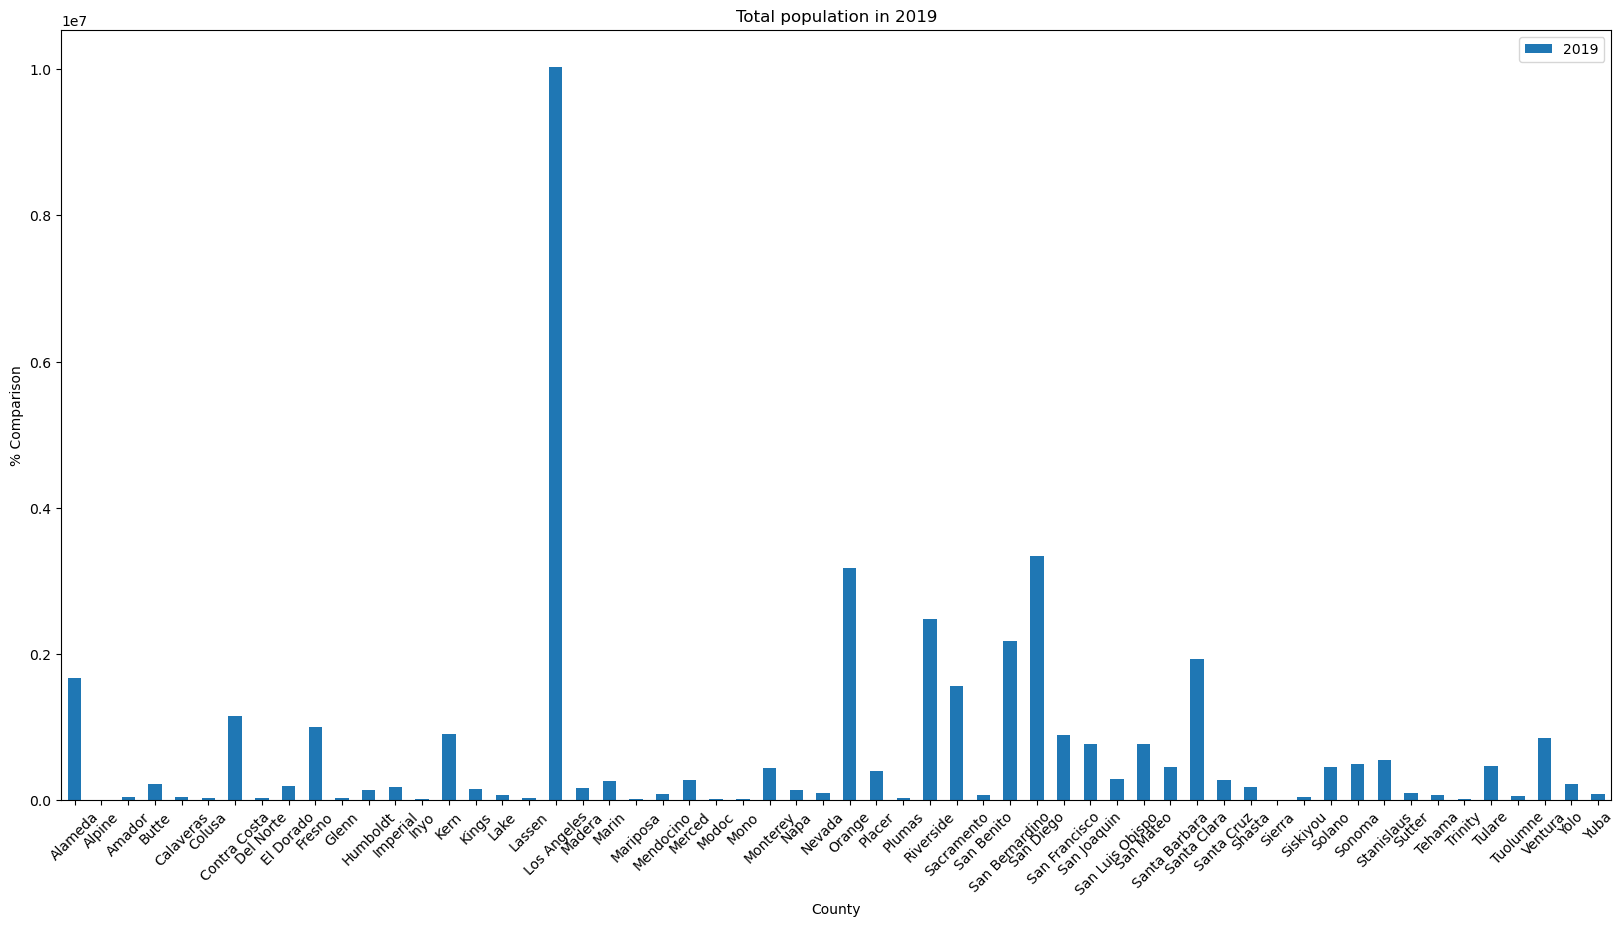

In [94]:
county_populationv3.plot( 'County' , '2019', kind='bar', rot=45, figsize=(20,10))
plt.title("Total population in 2019")
plt.ylabel("% Comparison")
#x = county_populationv3.iloc[4:12]
#x

In [95]:
percent_change = ((county_populationv3['2019']) - (county_populationv3['2011'])) / ((county_populationv3['2019']))
county_populationv3['% change 2011-2019'] = percent_change

county_populationv3.head()

,County,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,% change 2011-2019
4,Alameda,1510271.00,1510258.00,1512986.00,1530915.0,1553764.0,1579593.0,1607792.0,1634538.0,1650950.0,1660196.0,1666756.0,1671329.0,0.084013
5,Alpine,1175.00,1175.00,1161.00,1093.0,1110.0,1128.0,1080.0,1077.0,1047.0,1111.0,1089.0,1129.0,0.031887
6,Amador,38091.00,38091.00,37886.00,37543.0,37104.0,36620.0,36726.0,37031.0,37429.0,38529.0,39405.0,39752.0,0.055570
7,Butte,220000.00,220005.00,219949.00,219975.0,220869.0,221641.0,223516.0,224631.0,226231.0,228696.0,230339.0,219186.0,-0.003600
8,Calaveras,45578.00,45578.00,45468.00,45160.0,44815.0,44655.0,44671.0,44965.0,45322.0,45681.0,45698.0,45905.0,0.016229


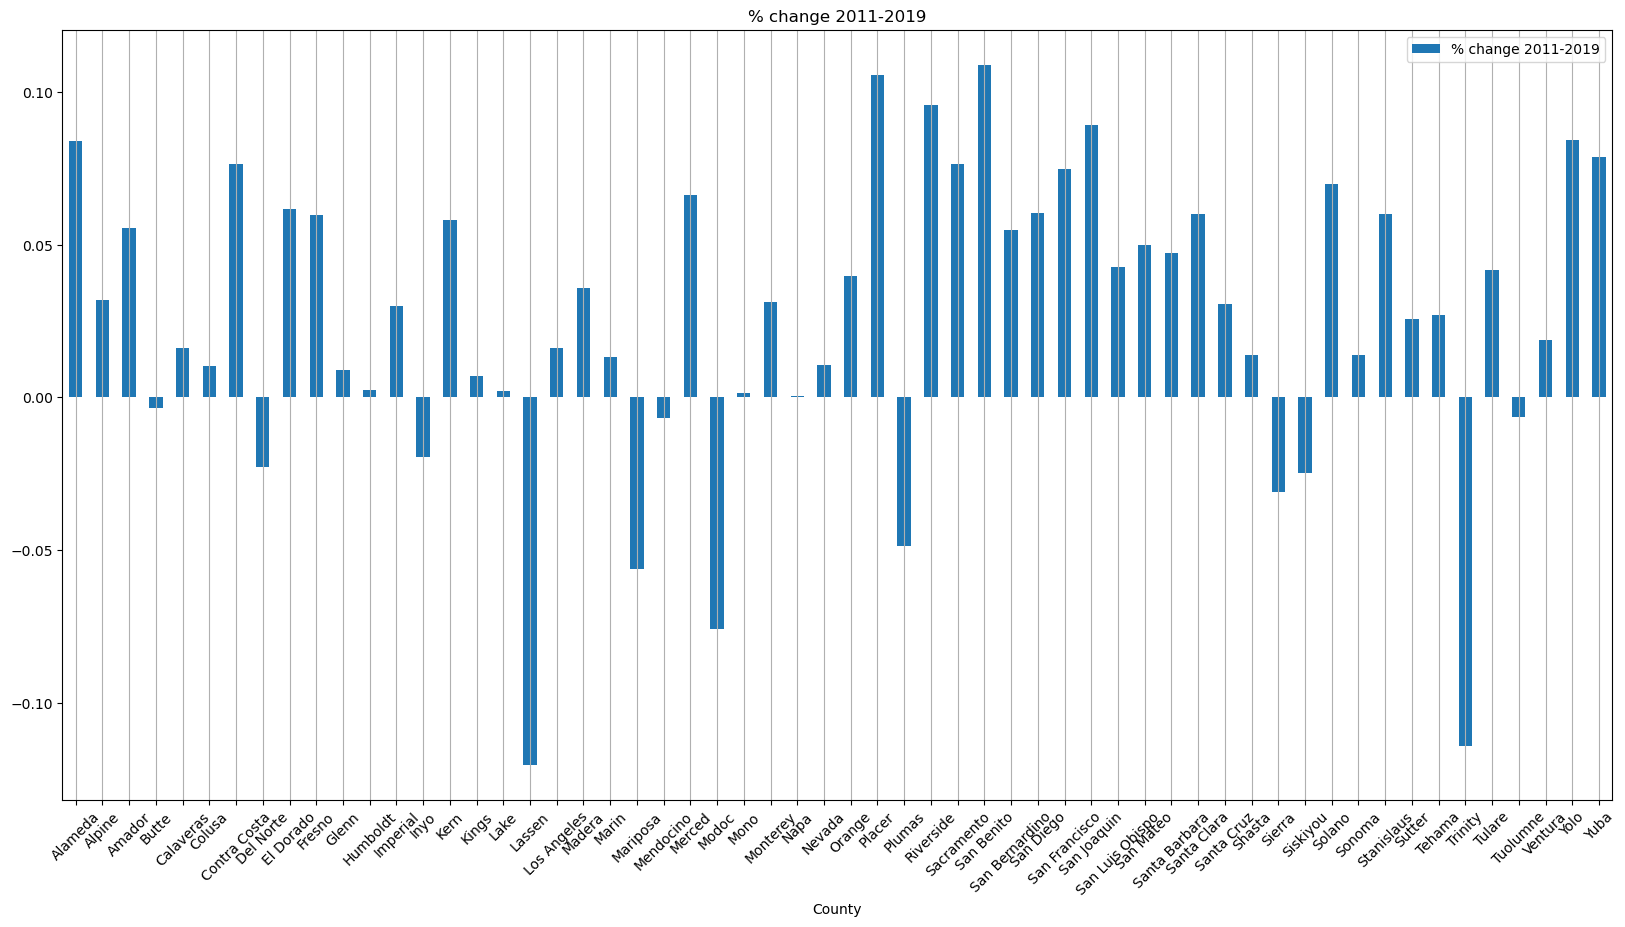

In [96]:
county_populationv3.plot( 'County' , '% change 2011-2019', kind='bar', rot=45, figsize=(20,10))
plt.title("% change 2011-2019")
plt.grid(axis='x')

In [97]:
county_populationv3 = county_populationv3.set_index('County')
county_list1 = county_list.rename(columns={'county_name':'County'})

mrged_pop = pd.merge(county_list1, county_populationv3, on='County')
mrged_pop.head()

,county_number,County,region,location1,location2,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,% change 2011-2019
0,1,Alameda,3,Coastal,North,1510271.00,1510258.00,1512986.00,1530915.0,1553764.0,1579593.0,1607792.0,1634538.0,1650950.0,1660196.0,1666756.0,1671329.0,0.084013
1,2,Alpine,4,Inland,North,1175.00,1175.00,1161.00,1093.0,1110.0,1128.0,1080.0,1077.0,1047.0,1111.0,1089.0,1129.0,0.031887
2,3,Amador,4,Inland,North,38091.00,38091.00,37886.00,37543.0,37104.0,36620.0,36726.0,37031.0,37429.0,38529.0,39405.0,39752.0,0.055570
3,4,Butte,1,Inland,North,220000.00,220005.00,219949.00,219975.0,220869.0,221641.0,223516.0,224631.0,226231.0,228696.0,230339.0,219186.0,-0.003600
4,5,Calaveras,4,Inland,North,45578.00,45578.00,45468.00,45160.0,44815.0,44655.0,44671.0,44965.0,45322.0,45681.0,45698.0,45905.0,0.016229


Text(0.5, 1.0, 'Coastal vs Inland population in 2019')

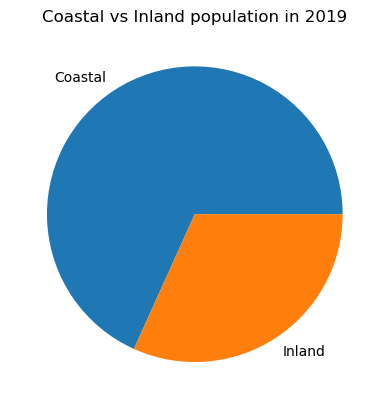

In [103]:
coastal_df = mrged_pop.loc[mrged_pop['location1']=='Coastal']
inland_df = mrged_pop.loc[mrged_pop['location1']=='Inland']

sum_2019_c = (coastal_df['2019']).sum()
sum_2010_c = (coastal_df['2010']).sum()
sum_2019_i = (inland_df['2019']).sum()
sum_2010_i = (inland_df['2010']).sum()

labels = ['Coastal', 'Inland']
sizes = [sum_2019_c, sum_2019_i]

plt.pie(sizes, labels=labels)
plt.title('Coastal vs Inland population in 2019')
#coastal_vs_inland = pd.DataFrames()
